In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2

In [3]:
df_train = pd.read_csv("../input/digit-recognizer/train.csv")
df_test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


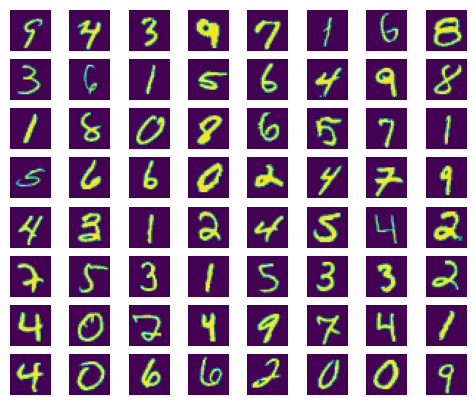

In [6]:
pixel_data = df_train.iloc[:, 1:]
rand_indices = np.random.choice(pixel_data.shape[0], 64, replace=False)
examples = pixel_data.iloc[rand_indices, :]

plt.figure(figsize=(6, 5))

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(examples.iloc[i, :].values.reshape(28, 28))
    plt.axis("off")

plt.show()

<Axes: xlabel='label', ylabel='count'>

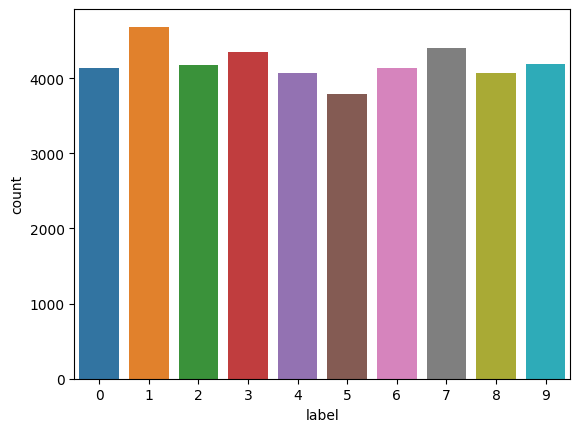

In [7]:
sns.countplot(data=df_train, x="label")

In [8]:
df_train_process = df_train.iloc[:, 1:] / 255.0
df_test_process = df_test / 255.0

In [9]:
print(df_train.values.max())
print(df_train_process.values.max())
print(df_test.values.max())
print(df_test_process.values.max())

255
1.0
255
1.0


In [10]:
num_train = df_train.shape[0]
num_test = df_test.shape[0]
height = 32
width = 32
channel = 3

train_input = np.zeros((num_train, height, width, channel))
test_input = np.zeros((num_test, height, width, channel))

for i in range(num_train):
    train_input[i,:28,:28,0] = df_train.iloc[i, 1:].values.reshape(28,28)
    train_input[i,:28,:28,1] = df_train.iloc[i, 1:].values.reshape(28,28)
    train_input[i,:28,:28,2] = df_train.iloc[i, 1:].values.reshape(28,28)
    train_input[i] = cv2.resize(train_input[i], (height, width))
    
for i in range(num_test):
    test_input[i,:28,:28,0] = df_test.iloc[i, :].values.reshape(28,28)
    test_input[i,:28,:28,1] = df_test.iloc[i, :].values.reshape(28,28)
    test_input[i,:28,:28,2] = df_test.iloc[i, :].values.reshape(28,28)
    test_input[i] = cv2.resize(test_input[i], (height, width))

train_label = np.array(df_train.iloc[:, 0])

print("Shape train input: ", train_input.shape)
print("Shape test input: ", test_input.shape)
print("Shape train label: ", train_label.shape)

Shape train input:  (42000, 32, 32, 3)
Shape test input:  (28000, 32, 32, 3)
Shape train label:  (42000,)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [12]:
# pretrained = keras.applications.InceptionResNetV2( # need shape (75, 75, 3)
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
# )

pretrained = keras.applications.ResNet152V2( # need shape (32, 32, 3)
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

model = keras.Sequential([
    pretrained,
    keras.layers.Flatten(),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ ?                      │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 58,187,904 (221.97 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [13]:
model.compile(optimizer='RMSprop', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(train_input, train_label, test_size=0.1, shuffle=True, random_state=42)
X_test = test_input

In [15]:
EPOCHS = 10
BATCH_SIZE = 128

train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10


I0000 00:00:1730754133.183612     103 service.cc:145] XLA service 0x7e16940052a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730754133.183674     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730754133.183678     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730754176.299957     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


296/296 ━━━━━━━━━━━━━━━━━━━━ 182s 282ms/step - accuracy: 0.1777 - loss: 2.2110 - val_accuracy: 0.5021 - val_loss: 1.7285
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 34s 114ms/step - accuracy: 0.6787 - loss: 1.0060 - val_accuracy: 0.9300 - val_loss: 0.4525
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.9424 - loss: 0.2188 - val_accuracy: 0.9681 - val_loss: 0.1700
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 0.9594 - loss: 0.1490 - val_accuracy: 0.9264 - val_loss: 0.3621
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 35s 117ms/step - accuracy: 0.9651 - loss: 0.1281 - val_accuracy: 0.9767 - val_loss: 0.0946
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 35s 118ms/step - accuracy: 0.9713 - loss: 0.1009 - val_accuracy: 0.9029 - val_loss: 0.4170
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 0.9727 - loss: 0.0988 - val_accuracy: 0.9793 - val_loss: 0.0921
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 0.9747 - loss: 0.0881 - va

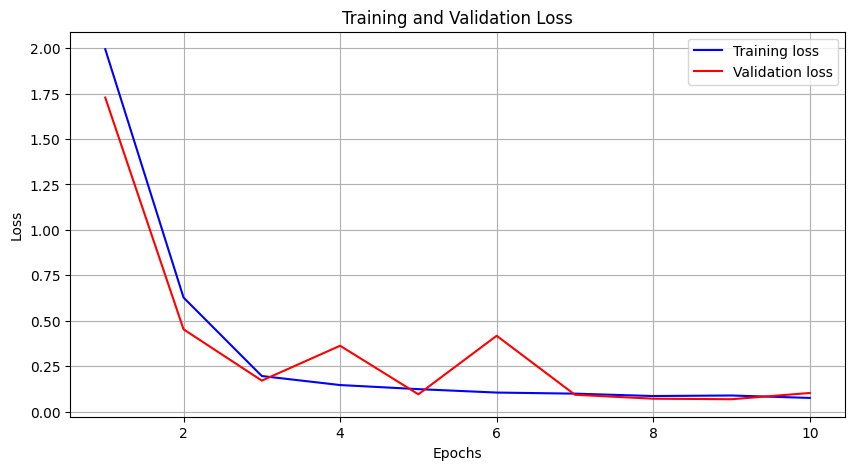

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

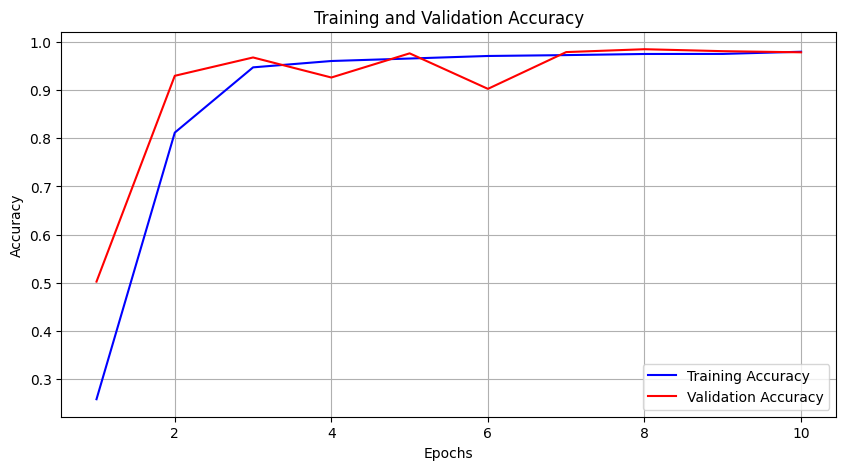

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [18]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions

875/875 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step


array([2, 0, 9, ..., 3, 9, 2])

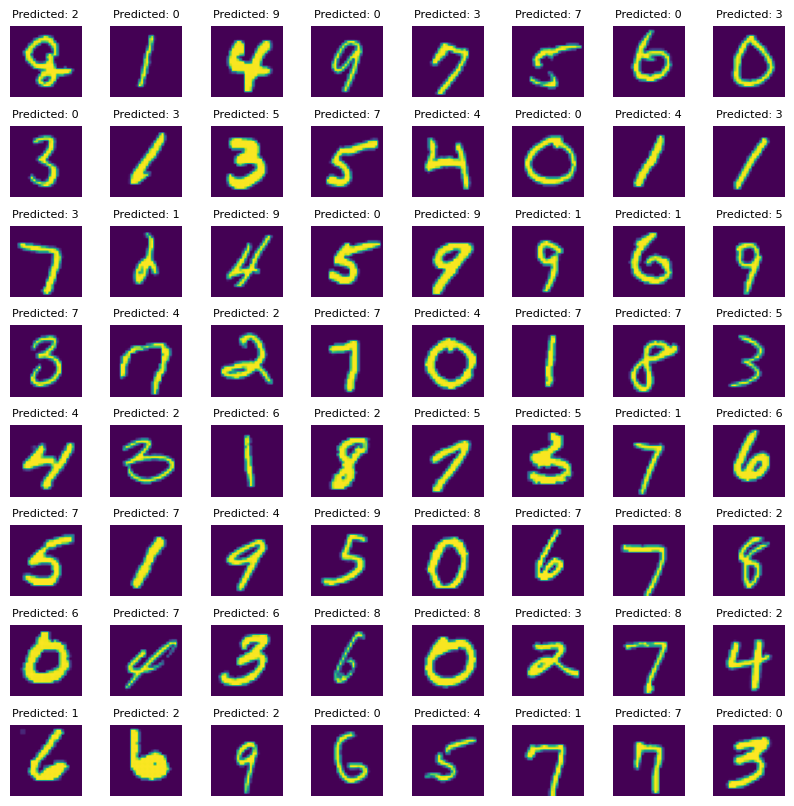

In [19]:
pixel_data = df_test.iloc[:, :]
rand_indices = np.random.choice(pixel_data.shape[0], 64, replace=False)
examples = pixel_data.iloc[rand_indices, :]

plt.figure(figsize=(10, 10))

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(examples.iloc[i, :].values.reshape(28, 28))
    plt.title(f"Predicted: {predictions[i]}", fontsize=8)
    plt.axis("off")

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [20]:
submission = pd.DataFrame({"ImageId": list(range(1, len(predictions) + 1)), "Label": predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [21]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
